# Установка PyTorch с поддержкой CUDA /  PyTorch installation with CUDA

**CUDA** — программно-аппаратная архитектура параллельных вычислений, которая позволяет существенно увеличить вычислительную производительность благодаря использованию графических процессоров фирмы Nvidia.  
**PyTorch** — фреймворк машинного обучения для языка Python с открытым исходным кодом, созданный на базе Torch. Используется для решения различных задач: компьютерное зрение, обработка естественного языка.  
Совместное использование CUDA и PyTorch позволяет ускорять работу задач машинного обучения.

## Проверяем наличие драйвера CUDA и его версию на ПК c Windows

В Интернете есть рекомендации использовать команду "nvcc --version". В моём случае она не сработала, т.к. не была обнаружена на ПК. Я использовал nvidia-smi. Эту команду запускаем из тетрадки.

In [2]:
!nvidia-smi

Thu Nov 16 17:04:39 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   32C    P0               6W /  40W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

В моём случае **CUDA Version: 12.3**  

## Устанавливаем нужную версию PyTorch

Идём на сайт https://pytorch.org/get-started/locally/ и подбираем нужную версию PyTorch.
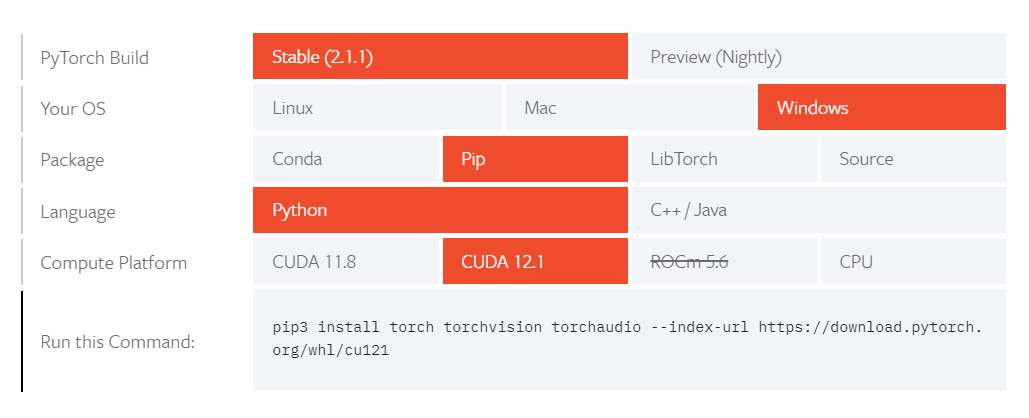

Можно запустить из тетрадки, можно из Anaconda Prompt.   
Учитывайте, что размер пакета около 2,5 GB и загрузка может занять до часа.

In [3]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

^C


## Проверяем установку библиотеки torch и доступность cuda

In [6]:
import torch
torch.cuda.is_available()

True

In [8]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [9]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [10]:
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [11]:
!nvidia-smi

Thu Nov 16 21:56:47 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   39C    P8               3W /  40W |     68MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--